In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../Data/2022mlbteams.csv')

* ### **_List of teams that qualified for the 2022 MLB Playoffs_**
* ### **_Source: MLB 2022 Postseason standings_**
* ### **_Used to create a derived feature 'Playoffs' (1 = Qualified, 0 = Not Qualified)_**

In [4]:
df['Tm'].unique()

array(['Arizona Diamondbacks', 'Atlanta Braves', 'Baltimore Orioles',
       'Boston Red Sox', 'Chicago Cubs', 'Chicago White Sox',
       'Cincinnati Reds', 'Cleveland Guardians', 'Colorado Rockies',
       'Detroit Tigers', 'Houston Astros', 'Kansas City Royals',
       'Los Angeles Angels', 'Los Angeles Dodgers', 'Miami Marlins',
       'Milwaukee Brewers', 'Minnesota Twins', 'New York Mets',
       'New York Yankees', 'Oakland Athletics', 'Philadelphia Phillies',
       'Pittsburgh Pirates', 'San Diego Padres', 'Seattle Mariners',
       'San Francisco Giants', 'St. Louis Cardinals', 'Tampa Bay Rays',
       'Texas Rangers', 'Toronto Blue Jays', 'Washington Nationals',
       'League Average'], dtype=object)

In [5]:
playoff_teams = [
    "Houston Astros", "New York Yankees", "Cleveland Guardians",
    "Seattle Mariners", "Tampa Bay Rays", "Toronto Blue Jays",
    "Los Angeles Dodgers", "Atlanta Braves", "New York Mets",
    "San Diego Padres", "Philadelphia Phillies", "St. Louis Cardinals"
]

In [9]:
df["Playoffs"] = df["Tm"].apply(lambda x: 1 if x in playoff_teams else 0)

In [10]:
df.to_csv("../Data/2022mlbteams.csv", index=False)

In [11]:
df.head()

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,Playoffs
0,Arizona Diamondbacks,57,26.5,4.33,162,6027,5351,702,1232,262,...,0.689,95,2061,97,60,31,50,14,1039,0
1,Atlanta Braves,53,27.5,4.87,162,6082,5509,789,1394,298,...,0.761,109,2443,103,66,1,36,13,1030,1
2,Baltimore Orioles,58,27.0,4.16,162,6049,5429,674,1281,275,...,0.695,99,2119,95,83,12,43,10,1095,0
3,Boston Red Sox,54,28.8,4.54,162,6144,5539,735,1427,352,...,0.731,102,2268,131,63,12,50,23,1133,0
4,Chicago Cubs,64,27.9,4.06,162,6072,5425,657,1293,265,...,0.698,94,2097,130,84,19,36,16,1100,0


In [12]:
df.drop(['Tm', '#Bat'],axis=1, inplace=True)

In [13]:
X = df.iloc[:, 0:27]

In [14]:
y = df.iloc[:, 27]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaleStandard = StandardScaler()

In [19]:
X_train = scaleStandard.fit_transform(X_train)

In [20]:
df.columns

Index(['BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP',
       'HBP', 'SH', 'SF', 'IBB', 'LOB', 'Playoffs'],
      dtype='object')

In [21]:
X_train = pd.DataFrame(X_train, columns=['BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP',
       'HBP', 'SH', 'SF', 'IBB', 'LOB'])

In [22]:
X_train.head()

,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,-2.039632,-0.079030,0.0,1.008670,1.767266,-0.080407,1.162380,0.190620,1.092020,-1.484972,...,-0.659147,-0.353040,0.155822,-0.320424,0.363244,0.764799,1.384476,1.454881,2.321924,1.518041
1,0.459635,1.054071,0.0,1.032150,0.723738,1.044021,0.811657,0.734487,-0.211885,0.650947,...,0.989649,1.038948,1.194637,1.018587,-0.082194,0.702788,-1.082189,0.465326,-0.648555,0.964629
2,-1.005452,-0.965804,0.0,-0.787565,-0.269298,-0.961715,-0.050538,-0.641177,2.004754,-1.149328,...,-0.792833,-0.746428,-0.779111,-0.774077,-0.782169,-1.281555,1.094280,0.323961,-1.123831,0.019216
3,1.666178,1.571356,0.0,1.114330,-0.521764,1.575845,-0.328194,-1.345005,-1.906961,2.390194,...,1.257021,1.220511,1.194637,1.033221,0.490513,0.082681,0.223693,-0.100133,2.321924,0.065333
4,-0.229818,0.044133,0.0,-0.564503,0.420778,0.056348,-0.328194,-1.376997,-0.342275,0.681460,...,-0.124402,-0.443822,-0.467467,-0.027744,-1.991216,-1.343566,-0.356699,-0.524228,-0.529735,-1.917728


In [23]:
X_train.describe()

,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
count,2.400000e+01,2.400000e+01,24.0,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,...,2.400000e+01,2.400000e+01,24.000000,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
mean,7.771561e-16,-1.461794e-15,0.0,3.534210e-15,7.401487e-17,5.551115e-16,1.091719e-15,-6.661338e-16,9.251859e-18,3.053113e-16,...,-1.961394e-15,-2.960595e-16,0.000000,1.091719e-15,-2.821817e-16,-3.145632e-16,-6.476301e-17,-3.099373e-16,1.110223e-16,-1.739349e-15
std,1.021508e+00,1.021508e+00,0.0,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,...,1.021508e+00,1.021508e+00,1.021508,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00
min,-2.039632e+00,-2.222068e+00,0.0,-2.431178e+00,-1.716773e+00,-2.222897e+00,-1.438818e+00,-1.536958e+00,-1.906961e+00,-2.003695e+00,...,-2.307942e+00,-2.380501e+00,-1.921808,-2.274062e+00,-1.991216e+00,-1.343566e+00,-1.372384e+00,-2.361972e+00,-1.242650e+00,-1.917728e+00
25%,-1.005452e+00,-6.024729e-01,0.0,-6.378784e-01,-7.026987e-01,-6.008343e-01,-8.908130e-01,-6.171825e-01,-6.356537e-01,-6.763742e-01,...,-5.923038e-01,-6.707768e-01,-0.701200,-5.929817e-01,-8.458028e-01,-7.389613e-01,-6.831693e-01,-7.009344e-01,-6.782594e-01,-6.149027e-01
50%,-1.005452e-01,-5.439704e-02,0.0,-3.032857e-02,-3.366221e-01,-5.001676e-02,-2.258999e-01,-6.531737e-02,-2.118846e-01,-6.611176e-02,...,-1.244024e-01,-1.563465e-01,-0.051941,-7.896260e-02,2.041593e-01,-3.823996e-01,-2.841501e-01,1.119139e-01,-2.920971e-01,8.839226e-02
75%,7.612711e-01,5.491022e-01,0.0,8.266982e-01,7.237375e-01,5.501844e-01,9.577914e-01,4.465575e-01,8.964347e-01,6.967163e-01,...,7.222764e-01,8.876445e-01,0.857022,7.643213e-01,6.336893e-01,7.182911e-01,4.050650e-01,5.006674e-01,6.881610e-01,6.360400e-01
max,1.666178e+00,2.187172e+00,0.0,1.994837e+00,1.767266e+00,2.183643e+00,1.951508e+00,2.718002e+00,2.004754e+00,2.390194e+00,...,1.970014e+00,1.946766e+00,1.714045,1.984431e+00,1.635926e+00,2.687132e+00,2.690357e+00,1.596246e+00,2.321924e+00,1.587218e+00


In [24]:
X_train.describe().round(3)

,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
count,24.000,24.000,24.0,24.000,24.000,24.000,24.000,24.000,24.000,24.000,...,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000
mean,0.000,-0.000,0.0,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,...,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000
std,1.022,1.022,0.0,1.022,1.022,1.022,1.022,1.022,1.022,1.022,...,1.022,1.022,1.022,1.022,1.022,1.022,1.022,1.022,1.022,1.022
min,-2.040,-2.222,0.0,-2.431,-1.717,-2.223,-1.439,-1.537,-1.907,-2.004,...,-2.308,-2.381,-1.922,-2.274,-1.991,-1.344,-1.372,-2.362,-1.243,-1.918
25%,-1.005,-0.602,0.0,-0.638,-0.703,-0.601,-0.891,-0.617,-0.636,-0.676,...,-0.592,-0.671,-0.701,-0.593,-0.846,-0.739,-0.683,-0.701,-0.678,-0.615
50%,-0.101,-0.054,0.0,-0.030,-0.337,-0.050,-0.226,-0.065,-0.212,-0.066,...,-0.124,-0.156,-0.052,-0.079,0.204,-0.382,-0.284,0.112,-0.292,0.088
75%,0.761,0.549,0.0,0.827,0.724,0.550,0.958,0.447,0.896,0.697,...,0.722,0.888,0.857,0.764,0.634,0.718,0.405,0.501,0.688,0.636
max,1.666,2.187,0.0,1.995,1.767,2.184,1.952,2.718,2.005,2.390,...,1.970,1.947,1.714,1.984,1.636,2.687,2.690,1.596,2.322,1.587


In [25]:
from sklearn.decomposition import PCA

In [26]:
pca1 = PCA()

In [27]:
X_pca1 = pca1.fit_transform(X_train)

In [28]:
pca1.explained_variance_ratio_

array([4.90657703e-01, 1.30594574e-01, 8.75972878e-02, 7.12410452e-02,
       5.33257577e-02, 3.71381136e-02, 3.26181951e-02, 2.43595881e-02,
       2.04814095e-02, 1.49623729e-02, 1.24494575e-02, 1.12086681e-02,
       6.40526670e-03, 2.91306500e-03, 2.23350766e-03, 1.31879363e-03,
       2.37970758e-04, 1.73401743e-04, 6.04313544e-05, 1.48760665e-05,
       5.05808451e-06, 2.90205010e-06, 5.54721718e-07, 8.72713586e-34])

In [29]:
import matplotlib.pyplot as plt

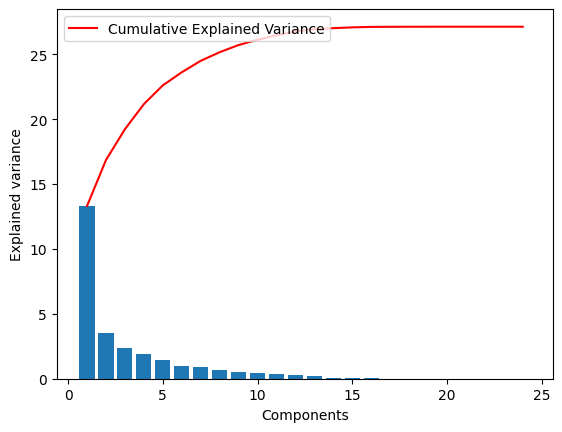

In [30]:
plt.bar(range(1,len(pca1.explained_variance_ )+1),pca1.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca1.explained_variance_ )+1),
         np.cumsum(pca1.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

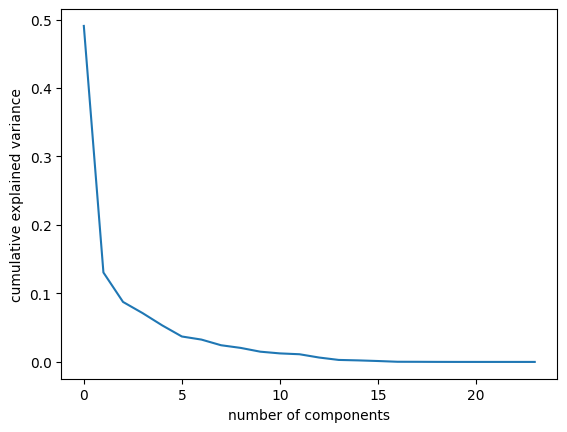

In [31]:
plt.plot(pca1.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [32]:
pca2 = PCA(0.95)

In [33]:
X_pca2 = pca2.fit_transform(X_train)

In [34]:
X_pca2.shape

(24, 10)

In [35]:
pca2.explained_variance_ratio_

array([0.4906577 , 0.13059457, 0.08759729, 0.07124105, 0.05332576,
       0.03713811, 0.0326182 , 0.02435959, 0.02048141, 0.01496237])

## **_2D visualization_**

In [36]:
pca2c = PCA(n_components=2)

In [37]:
X_pca2c = pca2c.fit_transform(X_train)

In [38]:
import matplotlib
colormap = matplotlib.colormaps['coolwarm']

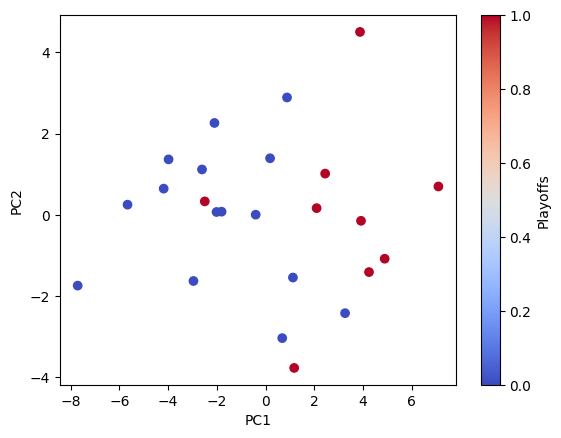

In [39]:
plt.figure()
scatter = plt.scatter(X_pca2c[:, 0], X_pca2c[:, 1], c=y_train, cmap=colormap)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Playoffs')
plt.show()

## **_3D visualization_**

In [40]:
pca3c = PCA(n_components=3)

In [41]:
X_pca3c = pca3c.fit_transform(X_train)

In [42]:
pca3c.explained_variance_ratio_

array([0.4906577 , 0.13059457, 0.08759729])

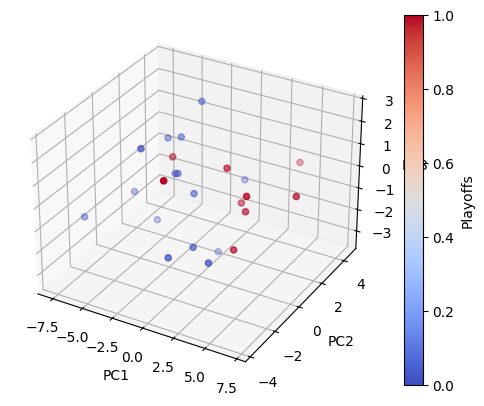

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib

colormap = matplotlib.colormaps['coolwarm']

# Create figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot (STORE it)
scatter = ax.scatter(
    X_pca3c[:, 0],
    X_pca3c[:, 1],
    X_pca3c[:, 2],
    c=y_train,
    cmap=colormap
)

# Axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
fig.colorbar(scatter, ax=ax, label='Playoffs')
plt.show()